# 逻辑回归
误差是指 预测y值和真实y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我 们采用平方误差:

$$ \sum_{i=1}^{m}\left(y_{i}-x_{i}^{\mathrm{T}} w\right)^{2}$$

用矩阵表示还可以写做 $(\mathrm{Y}-\mathbf{X} \mathrm{W})^{\mathrm{T}}(\mathrm{Y}-\mathbf{X} \mathrm{W})$,如果对$w$求导，会得到$\mathbf{X}^{\mathrm{T}}\left(\mathrm{Y}-\mathbf{X}_{\mathrm{W}}\right)$,解出w是
$$\hat{w}=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{y}$$

w上方的小标记表示，这是当前可以估计出的w的最优解,从现有数据上估计出的w可能并不 是数据中的真实w值，所以这里使用了一个“帽”符号来表示它仅是w的一个最佳估计。值得注意的是，上述公式中包含(X X) ，也就是需要对矩阵求逆，因此这个方程只在逆矩 阵存在的时候适用。然而，矩阵的逆可能并不存在，因此必须要在代码中对此作出判断。该方法也称作OLS， 意思是“普通最小二乘法”（ordinary least squares）。

In [1]:
import regression
from numpy import *
xArr, yArr = regression.loadDataSet('ex0.txt')
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [2]:
ws = regression.standRegres(xArr, yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

变量ws存放的就是回归系数。在用内积来预测y的时候，第一维将乘以前面的常数X0，第二 维将乘以输入变量X1。因为前面假定了X0=1，所以最终会得到$y=ws[0]+ws[1]*X1$。这里的y 实际是预测出的，为了和真实的y值区分开来，我们将它记为yHat。下面使用新的ws值计算yHat：

In [3]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws
yHat[:3]

matrix([[3.12257084],
        [3.73301922],
        [4.69582855]])

In [4]:
#创建了图像并绘出了原始的数据,为了绘制计算出的最佳拟合直线，需要绘出yHat 的值。如果直线上的数据点次序混乱，绘图时将会出现问题，所以首先要将点按照升序排列：
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])

有种方法可以计算预测值yHat序列和真实值y序列的匹配程度，那就是计算这两个序列的相关系数,在Python中，NumPy库提供了相关系数的计算方法：可以通过命令corrcoef(yEstimate, yActual)来计算预测值和真实值的相关性。该矩阵包含所有两两组合的相关系数。可以看到，对角线上的数据是1.0，因为yMat和自己的匹 配是最完美的，而yHat和yMat的相关系数为0.98。

In [5]:
corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## 局部加权线性回归

线性回归的一个问题是有可能出现欠拟合现象，因为它求的是具有最小均方误差的无偏估 计。显而易见，如果模型欠拟合将不能取得最好的预测效果。所以有些方法允许在估计中引入一 些偏差，从而降低预测的均方误差。

其中的一个方法是局部加权线性回归（Locally Weighted Linear Regression，LWLR）。在该算法中，我们给**待预测点附近**的每个点赋予一定的权重；然后与8.1节类似，在这个子集上基于最小均方差来进行普通的回归。与kNN一样，这种算法每次预测均需要事先选取出对应的数据子集。 该算法解出回归系数w的形式如下：$$\hat{w}=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{W X}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{W} y$$ 其中w是一个矩阵，用来给每个数据点赋予权重。  

LWLR使用“核”（与支持向量机中的核类似）来对附近的点赋予更高的权重以自由选择，最常用的核就是高斯核，高斯核对应的权重如下：$$w(i, i)=\exp \left(\frac{\left|x^{(i)}-x\right|}{-2 k^{2}}\right)$$

这样就构建了一个只含对角元素的权重矩阵w，x是待预测的点，并且点x与x(i)越近，w(i,i)将会越大。上 述公式包含一个需要用户指定的参数k，它决定了对附近的点赋予多大的权重，这也是使用LWLR 时唯一需要考虑的参数，在图8-4中可以看到参数k与权重的关系。

<img src="setHtml/pic.png" style="width:400;height:400px;">
每个点的权重图（假定我们正预测的点是x = 0.5），最上面的图是原始数据 集，第二个图显示了当k = 0.5时，大部分的数据都用于训练回归模型；而最 下面的图显示当k = 0.01时，仅有很少的局部点被用于训练回归模型。与kNN一样，该加权模型认为样本点距离越近，越可能符合同一个 线性模型

In [6]:
xArr, yArr = regression.loadDataSet('ex0.txt')
yArr[0]

3.176513

In [7]:
regression.lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

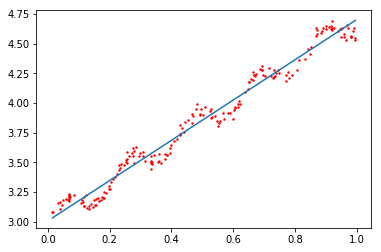

In [8]:
import matplotlib.pyplot as plt
def showLwlrPlot(xArr, yArr, k=1.0):
    yHat = regression.lwlrTest(xArr, xArr, yArr, k)
    xMat = mat(xArr)
    srtInd = xMat[:, 1].argsort(0)
    xSort = xMat[srtInd][:, 0, :]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xSort[:, 1], yHat[srtInd])
    ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0], s=2, c='red')
    plt.show()

showLwlrPlot(xArr, yArr)

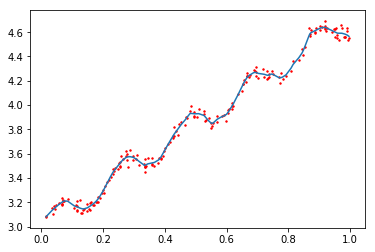

In [9]:
showLwlrPlot(xArr, yArr, 0.01)

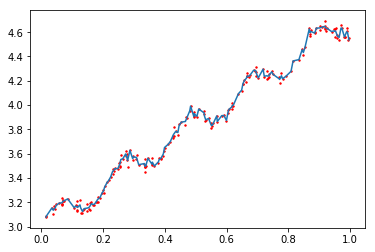

In [10]:
showLwlrPlot(xArr, yArr, 0.003)

小结：当k = 1.0时权重很大，如同将所有的数据视为等权重，得出的最佳拟合直线与标准的回归一致。使用k = 0.01得 到了非常好的效果，抓住了数据的潜在模式。下图使用k = 0.003纳入了太多的噪声点，拟合的直线与数据点过于贴近，是过拟合的一个例子，而最上图则是欠拟合的一个例子。

局部加权线性回归也存在一个问题，即增加了计算量，因为它对每个点做预测时都必须使用整个数据集。从图8-5可以看出，k = 0.01时可以得到很好的估计，但是同时看一下图8-4中k = 0.01的情 况，就会发现大多数据点的权重都接近零。如果避免这些计算将可以减少程序运行时间，从而缓解因计算量增加带来的问题。（使用正则化）

### 预测鲍鱼的年龄

In [11]:
def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
    return ((yArr-yHatArr)**2).sum()

abX, abY = regression.loadDataSet('abalone.txt')
yHat01 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = regression.lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)
rssError(abY[0:99], yHat01.T)

56.78420911837319

In [12]:
rssError(abY[0:99], yHat1.T)

429.8905618703138

In [13]:
rssError(abY[0:99], yHat10.T)

549.1181708827038

可以看到，使用较小的核将得到较低的误差。那么，为什么不在所有数据集上都使用最小的核呢？ 这是因为使用最小的核将造成过拟合，对新数据不一定能达到最好的预测效果。下面就来看看它 们在新数据(测试集)上的表现：

In [14]:
yHat01 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
rssError(abY[100:199], yHat01.T)

25119.417511792763

In [15]:
yHat1 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
rssError(abY[100:199], yHat1.T)

573.5261441897468

In [16]:
yHat10 = regression.lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
rssError(abY[100:199], yHat10.T)

517.571190538318

从上述结果可以看到，在上面的三个参数中，核大小等于10时的测试误差最小，但它在训练集上的误差却是最大的。接下来再来和简单的线性回归做个比较：

In [17]:
ws = regression.standRegres(abX[0:99], abY[0:99])
yHat = mat(abX[100:199]) * ws
rssError(abY[100:199], yHat.T.A)

518.6363153249081

简单线性回归达到了与局部加权线性回归类似的效果。这也表明一点，必须在未知数据上比 较效果才能选取到最佳模型。那么最佳的核大小是10吗？或许是，但如果想得到更好的效果，应 该用10个不同的样本集做10次测试来比较结果。

本例展示了如何使用局部加权线性回归来构建模型，可以得到比普通线性回归更好的效果。 局部加权线性回归的问题在于，每次必须在整个数据集上运行。也就是说为了做出预测，必须保 存所有的训练数据。下面将介绍另一种提高预测精度的方法，并分析它的优势所在。

## 缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预 测？答案是否定的，即不能再使用前面介绍的方法。这是因为在计算$\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1}$的时候会出错。如果特征比样本点还多（n > m），也就是说输入数据的矩阵X不是满秩矩阵。非满秩矩阵在 求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression）的概念，这就是本节将介绍的第一种缩减方法。接着是lasso法，该方法效果很好但计算复杂。本节最后介绍了第二种缩减方 法，称为前向逐步回归，可以得到与lasso差不多的效果，且更容易实现。

### 1. 岭回归

简单说来，岭回归就是在矩阵$\mathbf{X}^{\mathrm{T}} \mathbf{X}$上加一个λI从而使得矩阵非奇异，进而能对$\mathbf{X}^{\mathrm{T}} \mathbf{X}+\lambda \mathbf{I}$求逆。 其中矩阵I是一个m×m的单位矩阵，对角线上元素全为1，其他元素全为0。而λ是一个用户定义的 数值，后面会做介绍。在这种情况下，回归系数的计算公式将变成：
$$\hat{w}=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}+\lambda \boldsymbol{I}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{y}$$

**岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。**这里通过引入λ来限制了所有w之和，通过引入该惩罚项，能够减少不重要的参数，这 个技术在统计学中也叫做缩减(shrinkage)。

岭回归中的岭是什么？
岭回归使用了单位矩阵乘以常量λ，我们观察其中的单位矩阵I，可以看到值1贯穿整个对角线，其余元素全是0。形象地，在0构成的平面上有一条1组成的“岭”，这就是岭回归中的“岭”的由来。

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

与前几章里训练其他参数所用的方法类似，这里通过预测误差最小化得到λ：数据获取之后， 首先抽一部分数据用于测试，剩余的作为训练集用于训练参数w。训练完毕后在测试集上测试预 测性能。通过选取不同的λ来重复上述测试过程，最终得到一个使预测误差最小的λ。

<font color = 'red'>
在普通回归方法可 能会产生错误时，岭回归仍可以正常工作。那么是不是就不再需要检查行列式是否为零，对吗？ 不完全对，如果lambda设定为0的时候一样可能会产生错误，所以这里仍需要做一个检查。最后，如果矩阵非奇异就计算回归系数并返回。

<font color = 'red'>
这里的lambda 应以指数级变化，这样可以看出lambda在取非常小的值时和取非常大的值时分别对结果造成的影响。

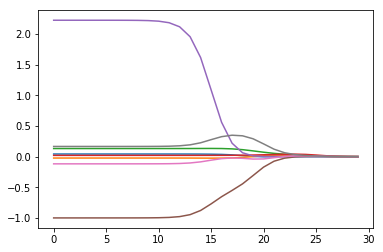

In [18]:
abX, abY = regression.loadDataSet('abalone.txt')
ridgeWeights = regression.ridgeTest(abX, abY)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()
#回归系数与log(λ)的关系

在最左边， 即λ最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减成0；在中 间部分的某值将可以取得最好的预测效果。为了定量地找到最佳参数值，还需要进行交叉验证。 另外，要判断哪些变量对结果预测最具有影响力，

还有一些其他缩减方法，如lasso、LAR、PCA回归 ① 以及子集选择等。与岭回归一样，这些 方法不仅可以提高预测精确率，而且可以解释回归系数。下面将对lasso方法稍作介绍。

### 2. lasso

不难证明，在增加如下约束时，普通的最小二乘法回归会得到与岭回归的一样的公式
$$ \sum_{k=1}^{n} w_{k}^{2} \leqslant \lambda$$
上式限定了所有回归系数的平方和不能大于λ。使用普通的最小二乘法回归在当两个或更多 的特征相关时，可能会得出一个很大的正系数和一个很大的负系数。正是因为上述限制条件的存 在，使用岭回归可以避免这个问题。

与岭回归类似，另一个缩减方法lasso也对回归系数做了限定，对应的约束条件如下：
$$\sum_{k=1}^{n}\left|w_{k}\right| \leqslant \lambda$$

<font color = 'red'>
唯一的不同点在于，这个约束条件使用绝对值取代了平方和。</font>虽然约束形式只是稍作变化， 结果却大相径庭：在λ足够小的时候，一些系数会因此被迫缩减到0 <font color = 'red'>原因见印象笔记 09-LASSO-Regression</font>，这个特性可以帮助我们更好 地理解数据。这两个约束条件在公式上看起来相差无几，但细微的变化却极大地增加了计算复杂 度（为了在这个新的约束条件下解出回归系数，需要使用二次规划算法）。下面将介绍一个更为简单的方法来得到结果，该方法叫做前向逐步回归。

### 前向逐步回归（用于不可以求导的目标函数）

前向逐步回归算法可以得到与lasso差不多的效果，但更加简单。它属于一种贪心算法，即每一步都尽可能减少误差。一开始，所有的权重都设为1，然后每一步所做的决策是对某个权重增加或减少一个很小的值。

该算法的伪代码如下所示：

    数据标准化，使其分布满足0均值和单位方差 
    在每轮迭代过程中：
      设置当前最小误差lowestError为正无穷 
      对每个特征： 
          增大或缩小：   
              改变一个系数得到一个新的W 
              计算新W下的误差             
              如果误差Error小于当前最小误差lowestError：设置Wbest等于当前的W
          将W设置为新的Wbest



In [19]:
xArr, yArr = regression.loadDataSet('abalone.txt')
regression.stageWise(xArr, yArr, 0.01, 200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

上述结果中值得注意的是w1和w6都是0，这表明它们不对目标值造成任何影响，也就是说这 些特征很可能是不需要的。另外，在参数eps设置为0.01的情况下，一段时间后系数就已经饱和 并在特定值之间来回震荡，这是因为步长太大的缘故。这里会看到，第一个权重在0.04和0.05之 间来回震荡。

下面试着用更小的步长和更多的步数：

In [20]:
regression.stageWise(xArr, yArr, 0.001, 5000)

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

接下来把这些结果与最小二乘法进行比较，后者的结果可以通过如下代码获得：

In [26]:
xMat = mat(xArr)
yMat = mat(yArr).T
xMat = regression.regularize(xMat)
yM = mean(yMat, 0)
yMat = yMat - yM
weights = regression.standRegres(xMat, yMat.T)
print(weights.T)

[[ 0.0430442  -0.02274163  0.13214087  0.02075182  2.22403814 -0.99895312
  -0.11725427  0.16622915]]


可以看到在5000次迭代以后，逐步线性回归算法与常规的最小二乘法效果类似。使用0.005 的epsilon值并经过1000次迭代后的结果参见下图。鲍鱼数据集上执行逐步线性回归法得到的系数与迭代次数间的关系。逐步线性 回归得到了与lasso相似的结果，但计算起来更加简便

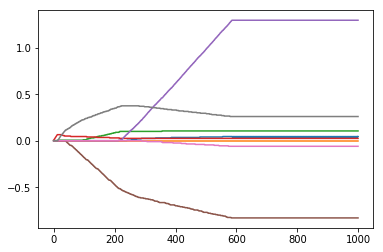

In [28]:
returnMat = regression.stageWise(xArr, yArr, 0.005, 1000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(returnMat)
plt.show()

逐步线性回归算法的实际好处并不在于能绘出上图这样漂亮的图，主要的优点在于它可以帮助 人们理解现有的模型并做出改进。当构建了一个模型后，可以运行该算法找出重要的特征，这样就 有可能及时停止对那些不重要特征的收集。最后，如果用于测试，该算法每100次迭代后就可以构建 出一个模型，可以使用类似于10折交叉验证的方法比较这些模型，最终选择使误差最小的模型。

当应用缩减方法（如逐步线性回归或岭回归）时，模型也就增加了偏差（bias），与此同时却 减小了模型的方差。下一节将揭示这些概念之间的关系并分析它们对结果的影响。

### 权衡偏差与方差

方差指的是模型之间的差异，而偏差指的是模型预测值和数据之间的差异

偏差与方差由三个部分组成：偏差、测量误差和随机噪声。在局部加权线性回归， 我们通过引入了三个越来越小的核来不断增大模型的方差。

缩减法，可以将一些系数缩减成很小的值或直接缩减为0，这是一个增大模型偏 差的例子。通过把一些特征的回归系数缩减到0，同时也就减少了模型的复杂度。例子中有8个特 征，消除其中两个后不仅使模型更易理解，同时还降低了预测误差。

方差是可以度量的。如果从鲍鱼数据中取一个随机样本集（例如取其中100个数据）并用线 性模型拟合，将会得到一组回归系数。同理，再取出另一组随机样本集并拟合，将会得到另一组 回归系数。这些系数间的差异大小也就是模型方差大小的反映 上述偏差与方差折中的概念在 机器学习十分流行并且反复出现。

###预测乐高玩具套装的价格

### 小结
#### 损失函数
线性回归
$$J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$

岭回归
$$J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\lambda \sum_{j=1}^{n} \theta_{j}^{2}$$

Lasso 回归
$$J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{e}\left(x^{(i)}\right)-y^{(i)}\right)_{0}^{2}+\lambda \sum_{j=1}^{n}\left|\theta_{j}\right|$$

与分类一样，回归也是预测目标值的过程。回归与分类的不同点在于，前者预测连续型变量, 而后者预测离散型变量。回归是统计学中最有力的工具之一。在回归方程里，求得特征对应的最佳回归系数的方法是**最小化误差的平方和**。给定输入矩阵X，如果XTX的逆存在并可以求得的话, 回归法都可以直接使用。数据集上计算出的回归方程并不一定意味着它是最佳的，可以使用预测值yHat和原始值y的相关性来度量回归方程的好坏。

当数据的样本数比特征数还少时候，矩阵XTX的逆不能直接计算。即便当样本数比特征数多时，XTX的逆仍有可能无法直接计算，这是因为特征有可能高度相关。这时可以考虑使用岭回归，因为当XTX的逆不能计算时，它仍保证能求得回归参数。

岭回归是缩减法的一种，相当于对回归系数的大小施加了限制。另一种很好的缩减法是lasso。 Lasso难以求解，但可以使用计算简便的逐步线性回归方法来求得近似结果。

缩减法还可以看做是对一个模型增加偏差的同时减少方差。偏差方差折中是一个重要的概 念，可以帮助我们理解现有模型并做出改进，从而得到更好的模型。

本章介绍的方法很有用。但有些时候数据间的关系可能会更加复杂，如预测值与特征之间是非线性关系，这种情况下使用线性的模型就难以拟合。

### 疑问
<font color='red'>
1. 为什么XTX 加上 $\lambda$ 不会有不能求逆的情况
  
2. 交叉验证测试岭回归 def crossValidation中有两处不明白，有关归一化的，标注在代码中了